# SENTIMENT ANALYSIS

**Sentiment analysis is a text mining technique that could extract emotions of a given text. It is mainly based on identifying positive, neutral and negative words and return a sentiment score. This technique is usually used on reviews or social media texts**

## Steps in Doing Sentiment Analysis

1. Import related libraries and dependencies

2. Import dataset

3. Cleaning dataset

4. Tokenizing dataset

5. Stemming dataset

6. Joining after tokenization and stemming

7. Analysis on the cleaned data


# Sentiment Analysis on Tweets dataset

In [1]:
!pip install nltk
!pip install wordcloud
!pip install sklearn
!pip install matplotlib
!pip install seaborn

**Importing libraries for Sentiment Analysis**

In [2]:
import string
import nltk
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from nltk.stem.porter import *

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import f1_score,accuracy_score,roc_curve,auc
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

**Importing the dataset**

The dataset consists of tweets that are labeled as pos tweets and neg tweets


In [3]:
data = pd.read_csv("sentiment.tsv",sep = "\t") #reading the datset file
data.columns = ['label','tweet_text'] #the data set has no headers there fore assigning column names to the dataframe
data.head(10) #reading the first ten rows

,label,tweet_text
0,pos,having a vodka tonic and looking forward to go...
1,pos,@ddlovatofans1neg1 Could you follow me please....
2,pos,@jordanknight for once.................. PLEAS...
3,neg,Had a dream about a walk in fast food resturau...
4,pos,@TroyBrownBBNews Yes... For a &quot;friend&quot;
5,pos,Packing for work expierance
6,neg,hates @internet @explrer (angry)(angry) **but ...
7,neg,@federalcase I said I go out for eat 5:negneg...
8,neg,@babykates7 yeah they won't do the surgery til...
9,pos,@BritRuxpin. I say answering with no pants.




**Assigning the Labels to Tweets**


In [4]:
#labels can be assignined through LabelEncoder (0 or 1) pos -> 1 and neg -> 0
le = LabelEncoder()
data['label'] = le.fit_transform(data['label']) #here transforming the tweets on the basis of their tags (pos and neg)
data.head(10)

,label,tweet_text
0,1,having a vodka tonic and looking forward to go...
1,1,@ddlovatofans1neg1 Could you follow me please....
2,1,@jordanknight for once.................. PLEAS...
3,0,Had a dream about a walk in fast food resturau...
4,1,@TroyBrownBBNews Yes... For a &quot;friend&quot;
5,1,Packing for work expierance
6,0,hates @internet @explrer (angry)(angry) **but ...
7,0,@federalcase I said I go out for eat 5:negneg...
8,0,@babykates7 yeah they won't do the surgery til...
9,1,@BritRuxpin. I say answering with no pants.




**Cleaning the dataset**


In [5]:
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern,input_txt) #finding the pattern
    for i in r:
        input_txt = re.sub(i,'',input_txt) #removing the pattern
    return input_txt # return the cleaned text

In [6]:
data['Tweet'] = np.vectorize(remove_pattern)(data['tweet_text'],"@[\w]*")  # removing @from tweets
data.head(10)

,label,tweet_text,Tweet
0,1,having a vodka tonic and looking forward to go...,having a vodka tonic and looking forward to go...
1,1,@ddlovatofans1neg1 Could you follow me please....,Could you follow me please.I would really app...
2,1,@jordanknight for once.................. PLEAS...,for once.................. PLEASE TELL US WHY...
3,0,Had a dream about a walk in fast food resturau...,Had a dream about a walk in fast food resturau...
4,1,@TroyBrownBBNews Yes... For a &quot;friend&quot;,Yes... For a &quot;friend&quot;
5,1,Packing for work expierance,Packing for work expierance
6,0,hates @internet @explrer (angry)(angry) **but ...,hates (angry)(angry) **but no choice** http...
7,0,@federalcase I said I go out for eat 5:negneg...,I said I go out for eat 5:negneg p.m. I dis...
8,0,@babykates7 yeah they won't do the surgery til...,yeah they won't do the surgery till the cold ...
9,1,@BritRuxpin. I say answering with no pants.,. I say answering with no pants.


In [7]:
data['Tweet'] = data['Tweet'].str.replace("[^a-zA-Z#]"," ") #cleaning data
data.head(10)

,label,tweet_text,Tweet
0,1,having a vodka tonic and looking forward to go...,having a vodka tonic and looking forward to go...
1,1,@ddlovatofans1neg1 Could you follow me please....,Could you follow me please I would really app...
2,1,@jordanknight for once.................. PLEAS...,for once PLEASE TELL US WHY...
3,0,Had a dream about a walk in fast food resturau...,Had a dream about a walk in fast food resturau...
4,1,@TroyBrownBBNews Yes... For a &quot;friend&quot;,Yes For a quot friend quot
5,1,Packing for work expierance,Packing for work expierance
6,0,hates @internet @explrer (angry)(angry) **but ...,hates angry angry but no choice http...
7,0,@federalcase I said I go out for eat 5:negneg...,I said I go out for eat negneg p m I dis...
8,0,@babykates7 yeah they won't do the surgery til...,yeah they won t do the surgery till the cold ...
9,1,@BritRuxpin. I say answering with no pants.,I say answering with no pants


In [8]:
data['Tweet'] = data['Tweet'].str.lower() #converting to lowercase
data.head(10)

,label,tweet_text,Tweet
0,1,having a vodka tonic and looking forward to go...,having a vodka tonic and looking forward to go...
1,1,@ddlovatofans1neg1 Could you follow me please....,could you follow me please i would really app...
2,1,@jordanknight for once.................. PLEAS...,for once please tell us why...
3,0,Had a dream about a walk in fast food resturau...,had a dream about a walk in fast food resturau...
4,1,@TroyBrownBBNews Yes... For a &quot;friend&quot;,yes for a quot friend quot
5,1,Packing for work expierance,packing for work expierance
6,0,hates @internet @explrer (angry)(angry) **but ...,hates angry angry but no choice http...
7,0,@federalcase I said I go out for eat 5:negneg...,i said i go out for eat negneg p m i dis...
8,0,@babykates7 yeah they won't do the surgery til...,yeah they won t do the surgery till the cold ...
9,1,@BritRuxpin. I say answering with no pants.,i say answering with no pants


**Tokenizing the tweets**

In [9]:
tokenized_tweet = data['Tweet'].apply(lambda x: x.split()) #split function will tokenize the tweets
tokenized_tweet.head(10)

0    [having, a, vodka, tonic, and, looking, forwar...
1    [could, you, follow, me, please, i, would, rea...
2    [for, once, please, tell, us, why, u, were, th...
3    [had, a, dream, about, a, walk, in, fast, food...
4                    [yes, for, a, quot, friend, quot]
5                     [packing, for, work, expierance]
6    [hates, angry, angry, but, no, choice, http, p...
7    [i, said, i, go, out, for, eat, negneg, p, m, ...
8    [yeah, they, won, t, do, the, surgery, till, t...
9                 [i, say, answering, with, no, pants]
Name: Tweet, dtype: object

**Stemmimg the tweets**

In [10]:
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])  #stemming the tweet
tokenized_tweet.head(10)

0    [have, a, vodka, tonic, and, look, forward, to...
1    [could, you, follow, me, pleas, i, would, real...
2    [for, onc, pleas, tell, us, whi, u, were, thin...
3    [had, a, dream, about, a, walk, in, fast, food...
4                     [ye, for, a, quot, friend, quot]
5                            [pack, for, work, expier]
6    [hate, angri, angri, but, no, choic, http, plu...
7    [i, said, i, go, out, for, eat, negneg, p, m, ...
8    [yeah, they, won, t, do, the, surgeri, till, t...
9                     [i, say, answer, with, no, pant]
Name: Tweet, dtype: object

**Making a tweet again after cleaning,tokenization and stemming**

In [11]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) #combining the tokenized and stemmed text 
data['Tweet'] = tokenized_tweet 
data.head()

,label,tweet_text,Tweet
0,1,having a vodka tonic and looking forward to go...,have a vodka tonic and look forward to go to s...
1,1,@ddlovatofans1neg1 Could you follow me please....,could you follow me pleas i would realli appre...
2,1,@jordanknight for once.................. PLEAS...,for onc pleas tell us whi u were think of thi ...
3,0,Had a dream about a walk in fast food resturau...,had a dream about a walk in fast food resturau...
4,1,@TroyBrownBBNews Yes... For a &quot;friend&quot;,ye for a quot friend quot


**Generating wordcloud for tweets**

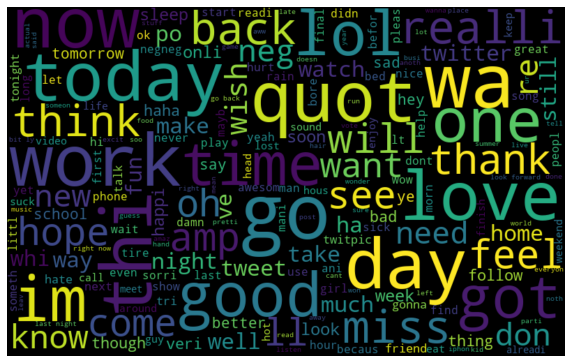

In [12]:
tweets_data = ' '.join([text for text in data['Tweet']]) #converting to str
wordcloud = WordCloud(width=800, height = 500, random_state=21,max_font_size=110).generate(tweets_data)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

**Wordcloud for positive tweets**

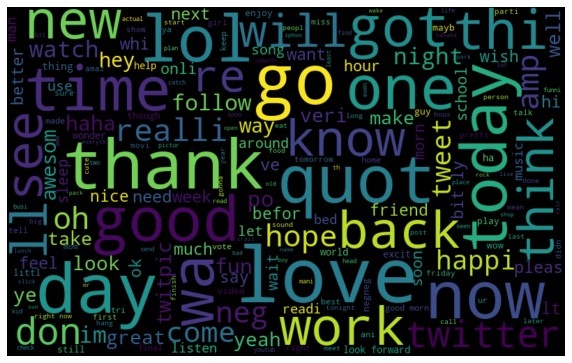

In [13]:
positive_tweets = ' '.join([text for text in data['Tweet'][data['label']==1]]) #generating wordcloud for postive tweets having label 1
wordcloud = WordCloud(width=800, height = 500, random_state=21,max_font_size=110).generate(positive_tweets)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

**Wordcloud for negative tweets**

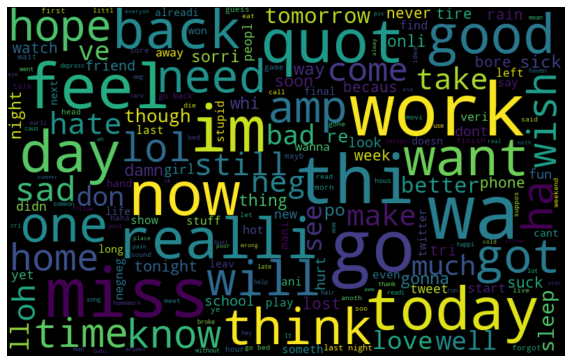

In [14]:
negative_tweets = ' '.join([text for text in data['Tweet'][data['label']==0]])#generating word cloud fro negative tweets having label 0
wordcloud = WordCloud(width=800, height = 500, random_state=21,max_font_size=110).generate(negative_tweets)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

**Hashtags**

In [15]:
# function to collect hashtags
def hashtag_extract(x):
    hashtag = []
    # loop over the words
    for i in x:
        ht = re.findall(r"#(\w+)",i) #finding hastags using reg exp
        hashtag.append(ht)
    return hashtag

In [16]:
hashtag_negative = hashtag_extract(data['Tweet'][data['label']==0]) #extrating the hashtag of negative tweets

hashtag_negative = sum(hashtag_negative,[])

print(hashtag_negative)

['github', 'fb', 'stupidgalaev', 'fb', 'nswdet', 'bgt', 'frenchopen', 'usmnt', 'lomo', 'fail', 'mashedlibneg', 'tweetdeck', 'tweetea', 'kevinjona', 'squarespac', 'familyforc']


In [17]:
hashtag_positive = hashtag_extract(data['Tweet'][data['label']==1]) #extrating the hashtag of negative tweets

hashtag_positive = sum(hashtag_positive,[])

print(hashtag_positive)

['followfriday', 'ti', 'asm', 'c', 'ff', 'musicmonday', 'laker', 'nba', 'ilovela', 'kobe', 'deathandtax', 'musicmonday', 'e', 'gimmefailwhal', 'gimmiefailwhal', 'ghacksg', 'wcchicago', 'jtv', 'boobsftw', 'sonsofanarchi', 'glee', 'flightcontrol', 'fce', 'followfriday', 'followfriday', 'ff', 'aftrsmachinima', 'starstrukk', 'coffeetim', 'annoy', 'followfriday', 'feliciadayrumor', 'the', 'digg', 'negtoneg', 'gbtu']


**Frequency Distribution of positive tweets**

In [18]:
a = nltk.FreqDist(hashtag_positive) #frquency dis for pos tweets
d = pd.DataFrame({'Hashtag':list(a.keys()),
                 'count':list(a.values())})
d.head()

,Hashtag,count
0,followfriday,4
1,ti,1
2,asm,1
3,c,1
4,ff,2


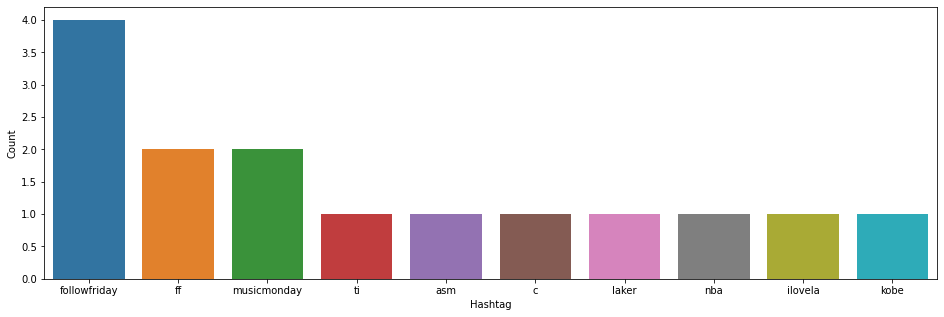

In [19]:
d = d.nlargest(columns = "count",n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d,x = 'Hashtag', y = "count")
ax.set(ylabel = 'Count')
plt.show()

**Frequency Distribution of negative tweets**

In [20]:
a = nltk.FreqDist(hashtag_negative) #frquency dis for pos tweets
d = pd.DataFrame({'Hashtag':list(a.keys()),
                 'count':list(a.values())})
d.head()

,Hashtag,count
0,github,1
1,fb,2
2,stupidgalaev,1
3,nswdet,1
4,bgt,1


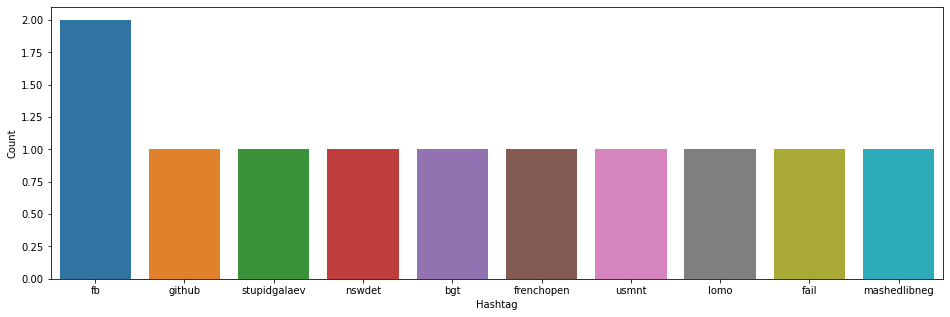

In [21]:
d = d.nlargest(columns = "count",n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d,x = 'Hashtag', y = "count")
ax.set(ylabel = 'Count')
plt.show()